# Pokemon - Temos que pegar!

“Vai Pikachu, choque do trovão!”<BR>
- -Ketchum, Ash

### Disclaimer


Óbviamente as alusões alegóricas mencionadas nesse notebook são apenas um artificio ludico utilizado para ilustrar e criar imersão para o leitor.

***

## Sobre esse notebook

Esse notebook foi feito para você, treinador de pokemons, que busca conhecimento sobre o universo pokemon. Aqui vamos dissecar os limites dessas incriveis criaturas, passando por todas as gerações e tipos de pokemons.<BR>
A pedido do professor Carvalho o cientista que vos escreve, tem como objetivo final a clusterização dos mais de 700 pokemons conhecidos.

### Sobre Pokemon

Pokemon é um jogo eletrônico lançado em 1996 no Japão, chegando em 1998 nos Estados Unidos e consequentemente no resto do mundo. Posteriormente a marca ganhou outros produtos como brinquedos, mangás e desenhos. Desenhos estes que se tornaram febre mundial e talvez sejam até mais conhecidos que o próprio jogo que originou a franquia.<BR><BR>
Pokemon foi criado por Satoshi Tajiri, com merchandising desenvolvido por várias companhias, jogos desenvolvidos pela empresa GameFreak subsidiada pela Nintendo do Japão.

***

### Entre no clima!


Você leitor que nasceu ou não nos anos 90, entre no clima: https://www.youtube.com/watch?v=-PlAg8R9TG4

***

- __Bibliotecas__ : As libs utilizadas nesse notebook são:

In [2]:
import math # Biblioteca para operações matematicas
import numpy as np # Para manipulacao de valores numericos 
import pandas as pd # Para manipulacao de estruturas de tabela
import sklearn # Para importar datasets
import seaborn as sns # Biblioteca auxiliar ao matplotlib tambem utilizada para plot de graficos
from matplotlib import pyplot as plt # Utilizado para criar plots graficos de dados
from datetime import datetime as dt # Para manipulacao de variaveis de tempo

Construido com Python 3.7.1 | 64 BITS<BR> Por: Marcelo Mastrangi Bracali. <BR> A utilizacao desse notebook e indiscriminada e o mesmo pode ser utilizado/modificado/consultado sem nem um tipo de restricao.

***

### O Dataset

Embora o professor Carvalho se interesse primeiramente muito mais em saber se você é um garoto ou uma garota, a nossa primeira preocupação é importar a base de dados com todos os pokemons, que aqui chamaremos de fulldex.

In [85]:
df_fulldex = pd.read_excel('01 - Pokemon.xlsx', index_col=0)

Vamos dar uma olhada para essa base e entender com o que estamos trabalhando

In [86]:
df_fulldex.head()

,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,Mega
Number,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0


Introduzidas mais recentemente, as mega evoluções transformam os pokemons no meio da batalha fornecendo uma mudança de dinamica nas batalhas. Nosso escopo não leva em consideração as mega evoluções

In [87]:
df_fulldex = df_fulldex[(df_fulldex.Mega == 0)]

In [89]:
df_fulldex.describe()

,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Mega
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.0
mean,427.394550,68.938389,77.213270,72.573460,71.093602,70.854265,66.721564,3.783175,0.0
std,114.680761,26.056759,30.590193,30.021512,31.025027,27.640916,28.231621,1.945070,0.0
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.0
25%,325.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,2.000000,0.0
50%,440.000000,65.000000,75.000000,70.000000,65.000000,68.000000,65.000000,4.000000,0.0
75%,500.000000,80.000000,98.000000,90.000000,92.000000,87.000000,89.250000,5.000000,0.0
max,770.000000,255.000000,181.000000,230.000000,180.000000,230.000000,180.000000,7.000000,0.0


A partir dos comandos head() e describe() podemos tirar algumas informações simples.<BR>
* __Atributos da base:__
 * *Number*: Numero do pokemon na Pokedex Nacional, leve em consideração como um ID unico para cada pokemon
 * *Name*: Nome do Pokémon em questão
 * *Type1*: Primeiro tipo do pokémon
 * *Type2*: Segundo tipo do Pokémon
 * *Total*: Soma de poder de todos os atributos do pokemon
 * *HP*: Quantidade de vida do pokemon
 * *Attack*: Força de ataque fisico do pokemon
 * *Defense*: Força de defesa fisica do pokemon
 * *SpecialAtk*: Força de ataque especial (poderes) do pokemon
 * *SpecialDef*: Força de ataque especial (poderes) do pokemon
 * *Speed*: Velocidade do pokemon
 * *Generation*: Em qual geração esse pokemon foi descoberto
 * *Legendary*: Se é um pokemon lendário ou não<BR><BR>

Ainda podemos destacar algumas coisas através da descrição do dataframe:
* __Sobre o dataset__:
 * O pokemon com maior soma de atributos possui 780 e a menor é 175
 * Existem pokemons com status realmente muito baixos, no geral as médias de vida, ataque e outros atributos é 72 e temos algumas amostras com 5 de ataque.
 * O pokemon mais fraco é mais de 2x mais fraco que um pokemon mediano
 * O pokemon mais forte não é nem 2x mais forte que um pokemon mediano
 * Em compensação, quando falamos de atributos individuais, as médias, os máximos e os minimos podem ser bem diferentes. Por exemplo a vida, o pokemon com mais vida tem mais de 4x mais vida que um pokemon na média

***

### Quantidades

Já tinha escutado que um estudante de Unova havia feito essa conta, mas é sempre interessante ver a quantidade de tipos de pokemon por geração

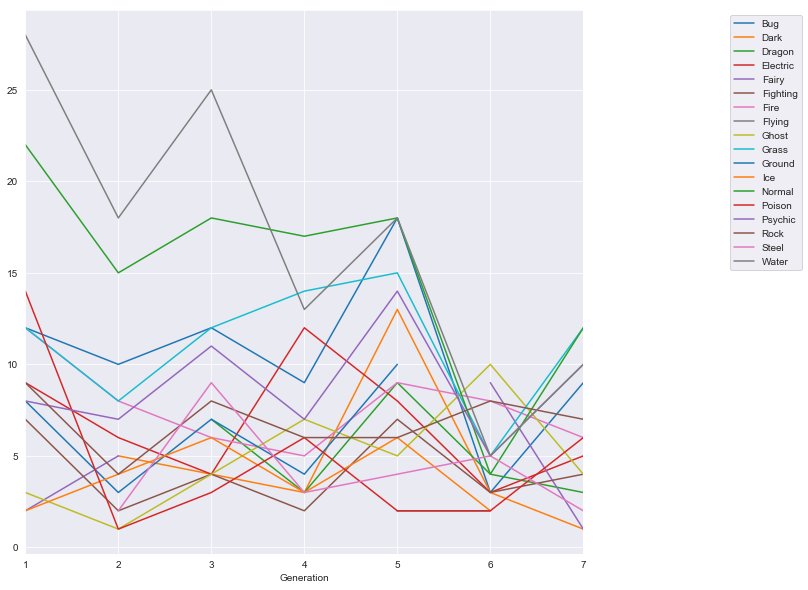

In [94]:
fig_size = plt.rcParams["figure.figsize"]
sns.set_style('darkgrid')
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

df_fulldex.groupby(['Generation','Type1']).size().unstack().plot().legend(loc='best',bbox_to_anchor=(0.9, 0.5, 0.5, 0.5))

Um dos pontos mais incriveis de uma jornada de um treinador é a possibilidade de contrar um pokemon lendário, mas é claro que as chances são sempre muito pequenas e por tanto quero entender o quão pequenas essas chances são

In [97]:
geracao_lendarios = df_fulldex.groupby(['Generation','Legendary']).size().reset_index()
geracao_lendarios.columns = ['Generation','Legendary','Contagem']

geracao_false = geracao_lendarios[(geracao_lendarios.Legendary == False)]
geracao_false.columns = ['Generation','Legendary','Contagem_nao_lendarios']

geracao_true = geracao_lendarios[(geracao_lendarios.Legendary == True)]
geracao_true.columns = ['Generation','Legendary','Contagem_lendarios']

geracao_lendarios = pd.merge(left=geracao_false,right=geracao_true, left_on='Generation', right_on='Generation')
geracao_lendarios.drop(['Legendary_x','Legendary_y'], axis = 1, inplace = True)
geracao_lendarios['tx_lendarios'] = np.round((geracao_lendarios['Contagem_lendarios'] / geracao_lendarios['Contagem_nao_lendarios'])*100)

geracao_lendarios.head()

,Generation,Contagem_nao_lendarios,Contagem_lendarios,tx_lendarios
0,1,147,4,3.0
1,2,94,5,5.0
2,3,125,15,12.0
3,4,102,13,13.0
4,5,149,15,10.0


É interessante perceber que a taxa de pokemons lendários por geração não passa de 13% por geração, mas esse numero é ainda menor quando olhamos uma taxa global:

In [111]:
lendarios = df_fulldex.groupby(['Legendary']).size().reset_index()
lendarios['join_index'] = 1

n_lendarios = lendarios[(lendarios.Legendary == False)]
n_lendarios.columns = ['Legendary','Nao_lendarios','join_index']

s_lendarios = lendarios[(lendarios.Legendary == True)]
s_lendarios.columns = ['Legendary','Lendarios','join_index']


lendarios = pd.merge(left=n_lendarios,right=s_lendarios, left_on='join_index', right_on='join_index')
lendarios['tx_lendarios'] = np.round((lendarios['Lendarios'] / lendarios['Nao_lendarios'])*100)

lendarios.head()

,Legendary_x,Nao_lendarios,join_index,Legendary_y,Lendarios,tx_lendarios
0,False,771,1,True,73,9.0


Os pokemons lendários são menos de 10% de todas as espécies que existem no mundo. Isso sem levar em consideração que existem muito mais pokemons normais soltos por ai do que pokemons lendários. Treinadores, não esqueçam de comprar e sempre andar com a sua camera fotográfica, um encontro com um pokemon lendário é unico e muito raro! Você não vai querer perder essa foto!